In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import MaxNLocator
import seaborn as sns

### 5-agent :

In [3]:
df_5_agents = pd.read_csv('logs/5_agents.csv')
df_5_agents.head()

,convex,n_trial,n_agents,iters,mpc_iter,obj_value,dual_res,primal_res
0,True,NaN,5,1,0,4196.728733,#NAME?,34.842228
1,True,NaN,5,2,0,4197.713852,-1.153825246,27.568551
2,True,NaN,5,3,0,4198.646946,-0.901085812,21.888757
3,True,NaN,5,4,0,4199.821741,-0.72148769,17.341216
4,True,NaN,5,5,0,4200.702456,-0.565396585,13.778702


In [4]:
convex_5_agents_df = df_5_agents.loc[df_5_agents['convex']==True]
nonconvex_5_agents_df = df_5_agents.loc[df_5_agents['convex']==False]

In [5]:
convex_5_agents_obj = convex_5_agents_df.groupby(['n_agents', 'mpc_iter'])['obj_value'].last().reset_index()

In [6]:
convex_5_agents_obj.shape

(151, 3)

In [7]:
nonconvex_5_agents_obj = nonconvex_5_agents_df.groupby(['n_agents', 'mpc_iter'])['obj_value'].last().reset_index()
nonconvex_5_agents_obj.shape

(151, 3)

In [8]:
from matplotlib import font_manager
import matplotlib
font_list = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
# font_list
from matplotlib.font_manager import FontProperties

In [9]:
font_path = '/usr/share/fonts/truetype/palatino/Palatino Normal.ttf'
# Create FontProperties object with the specified font file
font_prop = FontProperties(fname=font_path)

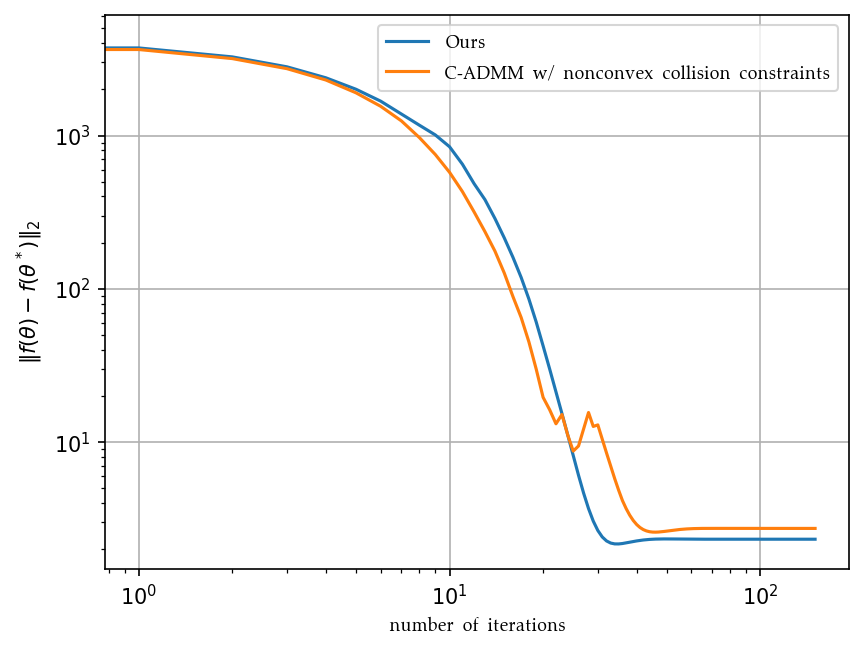

In [15]:
plt.figure(dpi=150)
plt.plot(convex_5_agents_obj['obj_value'],label='Ours')
plt.plot(nonconvex_5_agents_obj['obj_value'], label='C-ADMM w/ nonconvex collision constraints')

plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.legend(prop = font_prop)
plt.xlabel('number of iterations',fontproperties=font_prop)
plt.ylabel(r'$\|f(\theta) - f(\theta^*)\|_2$',fontproperties=font_prop);
plt.savefig('Convergence_comparison_5_agents.png',dpi=200)



### 3 Agents: